# Lab 2 MA course in Artificial Intelligence 2022/2023



In [ ]:
!rm -r AI2022MA
!git clone https://github.com/UmbertoJr/AI2022MA.git

## Knapsack Problem

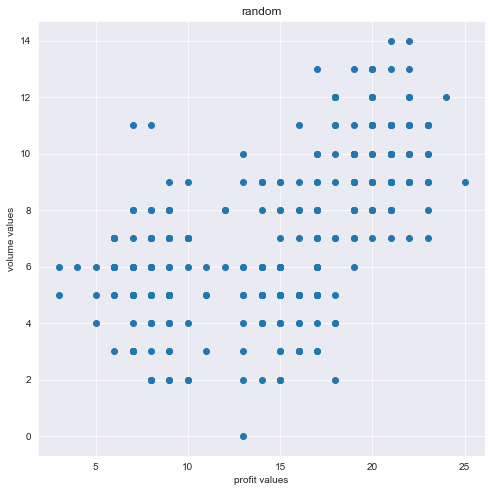

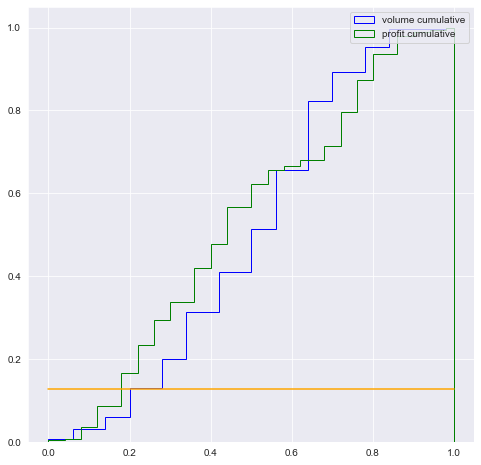

In [1]:
from IO_manager.io_kp import KP_Instance_Creator, distributions
# if you are running from your local remove the prefix AI2022MA (comment the previous lines and uncomment the following lines)
# from AI2022MA.IO_manager.io_kp import KP_Instance_Creator, distributions

# Creating an instance of the KP_Instance_Creator class.
ic = KP_Instance_Creator("random", dimension=300)
# Plotting the data in a scatter plot.
ic.plot_data_scatter()
# Plotting the data distribution.
ic.plot_data_distribution()

In [2]:
# Printing the different distributions that are available in the KP_Instance_Creator class.
for distr in distributions:
  print(distr)

uncorrelated
weakly_correlated
strongly_correlated
inverse_weakly_correlated
inverse_strongly_correlated
multiple_strongly_correlated
multiple_inverse_strongly_correlated
circle


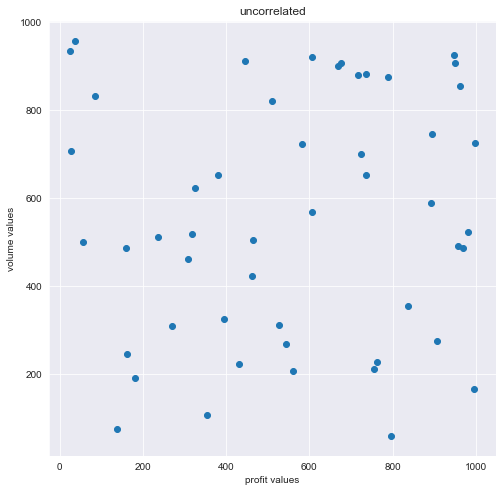

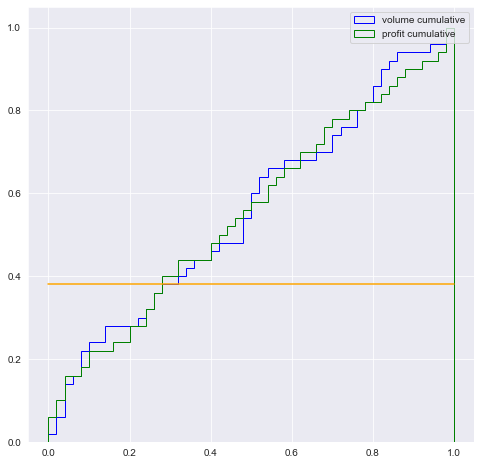

In [3]:
# Creating an instance of the KP_Instance_Creator class with the distribution "uncorrelated" and plotting the data
ic = KP_Instance_Creator("uncorrelated")
ic.plot_data_scatter()
ic.plot_data_distribution()

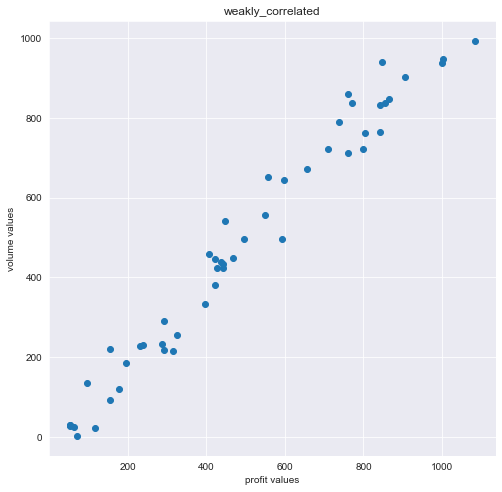

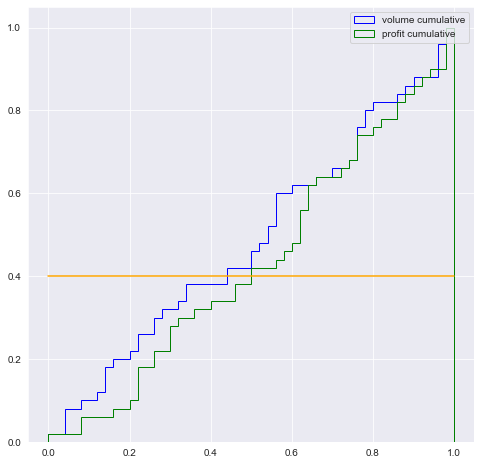

In [4]:
# Creating an instance of the KP_Instance_Creator class with the distribution "weakly_correlated" and plotting the data
ic = KP_Instance_Creator("weakly_correlated")
ic.plot_data_scatter()
ic.plot_data_distribution()

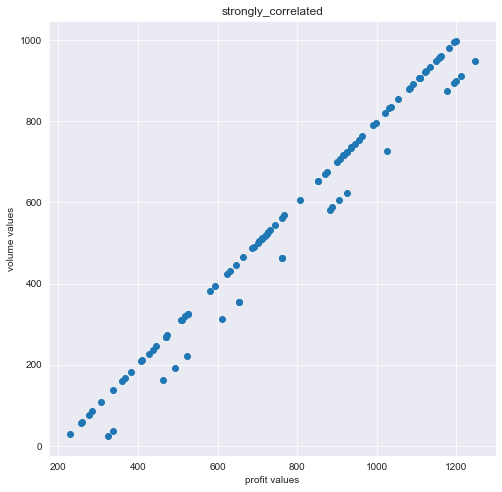

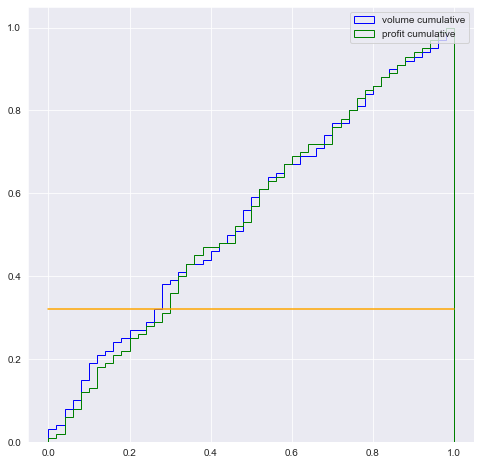

In [5]:
# Creating an instance of the KP_Instance_Creator class with the distribution "strongly_correlated" and plotting the data
ic = KP_Instance_Creator("strongly_correlated")
ic.plot_data_scatter()
ic.plot_data_distribution()

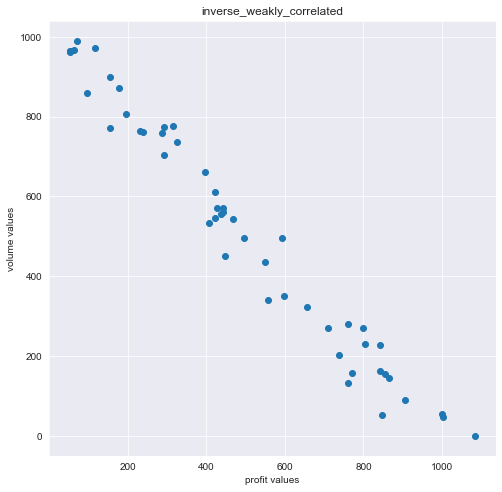

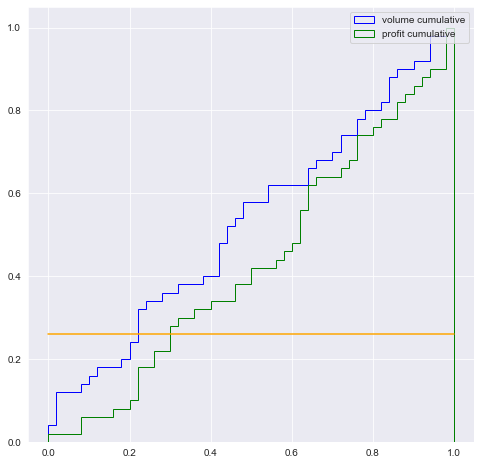

In [6]:
# Creating an instance of the KP_Instance_Creator class with the distribution "inverse_weakly_correlated" and plotting the data
ic = KP_Instance_Creator("inverse_weakly_correlated")
ic.plot_data_scatter()
ic.plot_data_distribution()

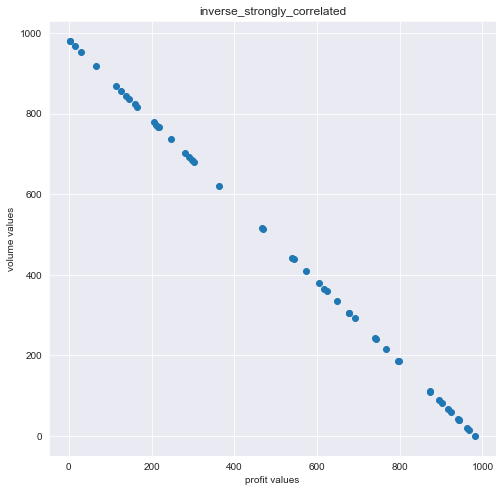

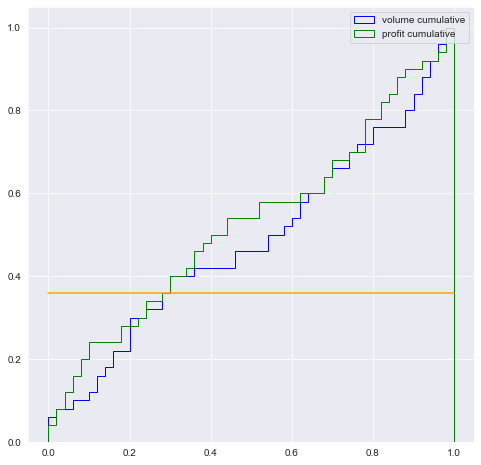

In [7]:
# Creating an instance of the KP_Instance_Creator class with the distribution "inverse_strongly_correlated" and plotting the data
ic = KP_Instance_Creator("inverse_strongly_correlated")
ic.plot_data_scatter()
ic.plot_data_distribution()

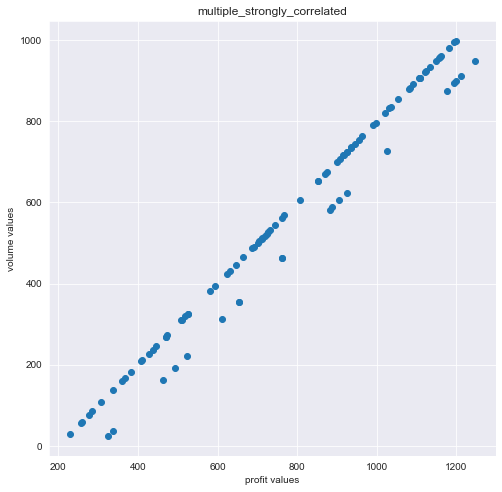

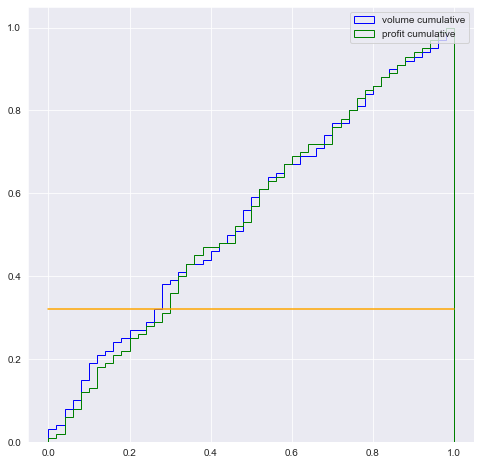

In [8]:
# Creating an instance of the KP_Instance_Creator class with the distribution "multiple_strongly_correlated" and plotting the data
ic = KP_Instance_Creator("multiple_strongly_correlated")
ic.plot_data_scatter()
ic.plot_data_distribution()

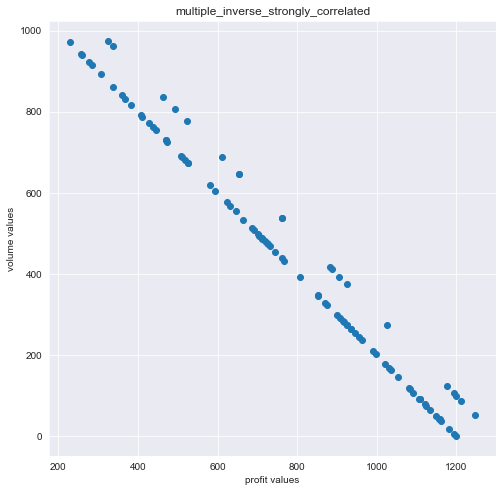

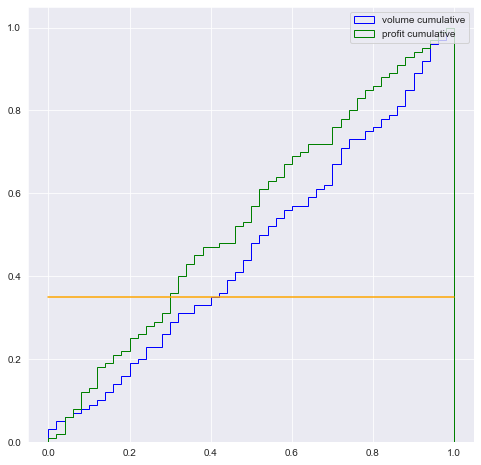

In [9]:
# Creating an instance of the KP_Instance_Creator class with the distribution "multiple_inverse_strongly_correlated" and plotting the data
ic = KP_Instance_Creator("multiple_inverse_strongly_correlated")
ic.plot_data_scatter()
ic.plot_data_distribution()

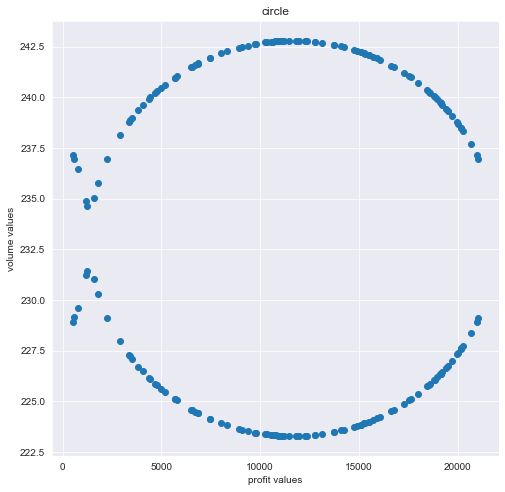

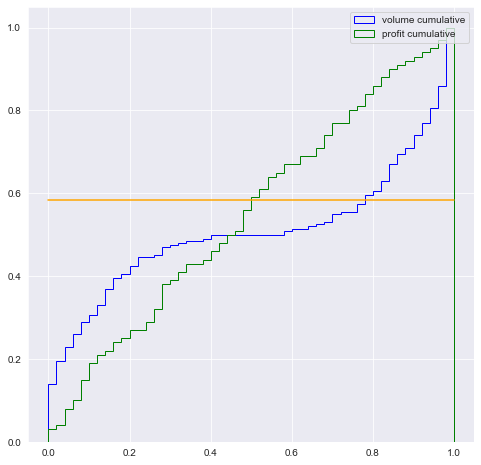

In [10]:
# Creating an instance of the KP_Instance_Creator class with the distribution "circle" and plotting the data
ic = KP_Instance_Creator("circle")
ic.plot_data_scatter()
ic.plot_data_distribution()

## Solving the Knapsack Problem

In [11]:
algorithms = ["Greedy approach", "Exhaustive search", "Dynamic algorithm"]
times = []
profits = []
capacities = []


### Greedy approach

In [12]:
import numpy as np
from time import time

In [13]:
import matplotlib.pyplot as plt

def plot_solution(solution, profit_items, volume_items, color="red"):
    """
    It plots the profit and volume values of the items, and then plots the profit and volume values of the items that are
    selected in the solution

    :param solution: the solution to the problem, which is a list of 0s and 1s
    :param profit_items: the profit values of each item
    :param volume_items: the volume of each item
    :param color: The color of the solution points, defaults to red (optional)
    """
    plt.figure(figsize=(8, 8))
    plt.scatter(profit_items, volume_items, label='Not included items')
    plt.scatter(profit_items[solution],
                volume_items[solution], c=color, label='Included items')
    plt.xlabel("profit values")
    plt.ylabel("volume values")
    plt.legend()

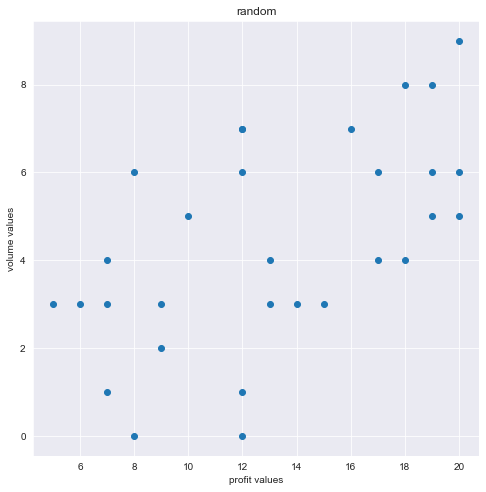

In [14]:
# Creating a random instance of the knapsack problem with 30 items and plotting the data/items in a scatter plot
ic = KP_Instance_Creator("random", dimension=30)
ic.plot_data_scatter()

In [15]:
def greedy_approach(ic):
    """
    This is the greedy approach to the knapsack problem.
    We sort the items in descending order of profit/volume ratio, and then add the sorted items to the knapsack in order of
    decreasing profit/volume ratio until the knapsack is full

    :param ic: The instance of the knapsack problem
    :return: The items, solution, total volume and total profit
    """
    tot_p = 0
    tot_v = 0

    p_to_v = ic.profit_items / ic.volume_items
    sorted_idx = np.argsort(p_to_v)[::-1]

    sol = np.zeros(len(p_to_v), bool)
    items = []

    for i in range(len(p_to_v)):
        j = sorted_idx[i]
        if tot_v + ic.volume_items[j] < ic.capacity:
            tot_v += ic.volume_items[j]
            tot_p += ic.profit_items[j]
            sol[j] = True
            items.append(j)

    return items, sol, tot_v, tot_p

In [16]:
# Calculating the time it takes to run the greedy approach.
start = time()
items, sol, tot_v, tot_p = greedy_approach(ic)
end_time = np.round(time() - start, 5)

times.append(end_time)
profits.append(tot_p)
capacities.append(tot_v)

/var/folders/7y/jwt0sz293lb5sh9_kg_34z9c0000gn/T/ipykernel_67548/174331281.py:13: RuntimeWarning: divide by zero encountered in true_divide
  p_to_v = ic.profit_items / ic.volume_items


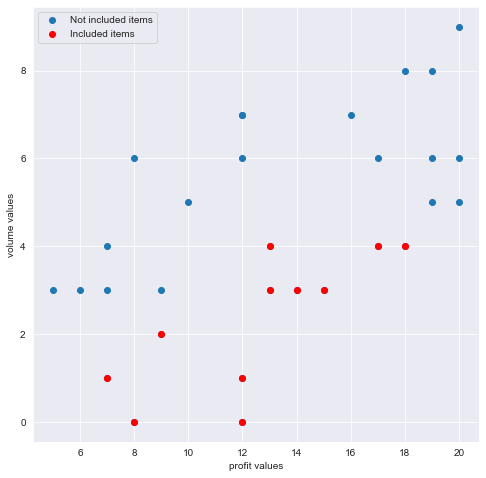

solution: [20, 18, 7, 19, 13, 15, 24, 21, 14, 3, 2]
time to solve the problem = 0.00057 seconds
final profit =  138 
final capacity =  25 / 26 ( 96.15 % )


In [17]:
# Plotting the solution of the problem.
plot_solution(np.where(sol > 0), ic.profit_items, ic.volume_items)
plt.show()

# Printing the solution (index of the items in the knapsack), the total profit and capacity of the solution.
print("solution:", items)
print("time to solve the problem =", end_time, "seconds")
print("final profit = ", int(tot_p), "\nfinal capacity = ", int(tot_v), "/", ic.capacity, "(", np.round(np.sum(ic.volume_items[sol]) / ic.capacity * 100, 2), "% )")

### Exhaustive search

Depth-first search implementation

In [18]:
def exhaustive_search(C, wt, val, n, curr_sol):
  """
  > We are trying to find the maximum value of the items that we can fit in the knapsack, given the weight of the items
  and the capacity of the knapsack

  :param C: the maximum weight the knapsack can hold
  :param wt: list of weights of the items
  :param val: list of values of each item
  :param n: number of items
  :param curr_sol: the current solution
  :return: The maximum value that can be put in a knapsack of capacity W and the solution that achieves that value.
  """
  # Final case of the recursion: if the number of items is 0 or the capacity of the knapsack is 0,
  # then the maximum value that can be put in the knapsack is 0.
  if n == 0 or C == 0:
    return 0, curr_sol

  # Checking if the weight of the current item is greater than the capacity of the knapsack (C).
  # If it is, then it is not included in the optimal solution.
  if wt[n - 1] > C:
    return exhaustive_search(C, wt, val, n - 1, curr_sol)

  # return the maximum of two cases:
  # (1) nth item included
  # (2) not included
  # The above code is implementing the recursive solution to the knapsack problem.
  else:
    # Calling the function recursively, but with a smaller capacity (C - wt[n - 1]) and a smaller number of items (n -
    # 1).
    v_curr_included, curr_sol_included = exhaustive_search(C - wt[n - 1], wt, val, n - 1, curr_sol + [n - 1])
    v_curr_included += val[n - 1]
    v_curr_not_included, curr_sol_not_included = exhaustive_search(C, wt, val, n - 1, curr_sol)

    # Checking if the value of the current item is greater than the value of the current item not included.
    # If it is, then it is included in the optimal solution.
    if v_curr_included > v_curr_not_included:
      curr_sol_included.append(n - 1)
      return v_curr_included, curr_sol_included
    else:
      return v_curr_not_included, curr_sol_not_included


In [19]:
# Calculating the time it takes to solve the problem.
start = time()
value_optimal_sol, optimal_sol = exhaustive_search(ic.capacity, ic.volume_items, ic.profit_items, ic.nItems, [])
end_time = np.round(time() - start, 5)

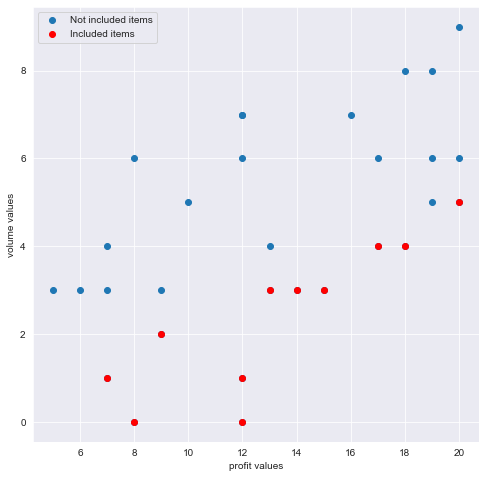

solution: [20, 18, 7, 19, 13, 15, 24, 21, 14, 3, 2]
time to solve the problem = 4.89768 seconds
final profit =  145 
final capacity =  26 / 26 ( 100.0 % )


In [20]:
# Creating a list of zeros of the same length of the number of items, and then it is setting to True the elements that are in the optimal solution.
sol_opt = np.zeros(ic.nItems, bool)
for i in optimal_sol:
  sol_opt[i] = True

profit = int(np.sum(ic.profit_items[sol_opt]))
capacity = int(np.sum(ic.volume_items[sol_opt]))
times.append(end_time)
profits.append(profit)
capacities.append(capacity)

# Plotting the solution of the problem.
plot_solution(np.where(sol_opt > 0), ic.profit_items, ic.volume_items, color="red")
plt.show()

# Printing the solution (index of the items in the knapsack), the total profit and capacity of the solution.
print("solution:", items)
print("time to solve the problem =", end_time, "seconds")
print("final profit = ", profit, "\nfinal capacity = ", capacity, "/", ic.capacity, "(", np.round(capacity / ic.capacity * 100, 2), "% )")

### Dynamic algorithm

In [21]:
def dynamic_table_creation(ic):
    """
    The function takes in an instance of the knapsack problem and returns a table K[][] where K[i][w] is the maximum profit
    that can be obtained with a knapsack of capacity w using the first i items

    :param ic: the instance of the class InstanceContainer
    :return: the table K[][] is being returned.
    """

    table = [[0 for x in range(ic.capacity + 1)] for x in range(ic.nItems + 1)]

    # Build table table[][] in bottom up manner
    for i in range(ic.nItems + 1):
        for w in range(ic.capacity + 1):
            # Setting the 0th row and column to 0.
            if i == 0 or w == 0:
                table[i][w] = 0
            # Checking that the weight of the i(th) item is less that the total weight permissible for that cell (w).
            elif ic.volume_items[i - 1] <= w:
                # Selecting the maximum out of the two options available to us. We can either include the object or exclude it.
                included_item = ic.profit_items[i - 1] + table[i - 1][int(w - ic.volume_items[i - 1])]
                not_included_item = table[i - 1][w]
                table[i][w] = max(included_item, not_included_item)
            # When the weight of ith object is greater than the permissible limit
            else:
                table[i][w] = table[i - 1][w]
    return table


def create_solution_from_table(table, ic):
    """
    > If the value of the current cell is different from the value of the cell above it, then the item corresponding to the
    current cell is in the solution

    :param table: the table that was created by the dynamic programming algorithm
    :param ic: the instance of the problem
    :return: the solution is being returned.
    """
    # The last cell of the table stores the result of Knapsack, the total profit
    total_profit = int(table[ic.nItems][ic.capacity])

    n, w = ic.nItems, ic.capacity
    solution = []

    for i in range(n, 0, -1):
        if total_profit <= 0:
            break
        # Either the result comes from the top (K[i-1][w]) or from (val[i-1] + K[i-1] [w-wt[i-1]]) as in Knapsack table. If it comes from the latter one it means the item is included.
        if total_profit == int(table[i - 1][w]):
            continue
        # This item is included.
        else:
            solution.append(i - 1)

            # Since this weight is included its value is deducted
            total_profit = total_profit - int(ic.profit_items[i - 1])
            w = w - int(ic.volume_items[i - 1])

    return solution


def dynamic_algorithm(ic):
    """
    > Creating a table with the optimal values for each item and each capacity, and the solution from the table.

    :param ic: the instance of the knapsack problem
    :return: the first value is the optimal value of the knapsack problem. The second value is the solution to the knapsack
    problem.
    """
    table = dynamic_table_creation(ic)
    sol = create_solution_from_table(table, ic)

    return table[ic.nItems][ic.capacity], sol

In [22]:
# Calculating the time it takes to run the greedy approach.
start = time()
value_optimal_sol, optimal_sol = dynamic_algorithm(ic)
end_time =  np.round(time() - start, 5)

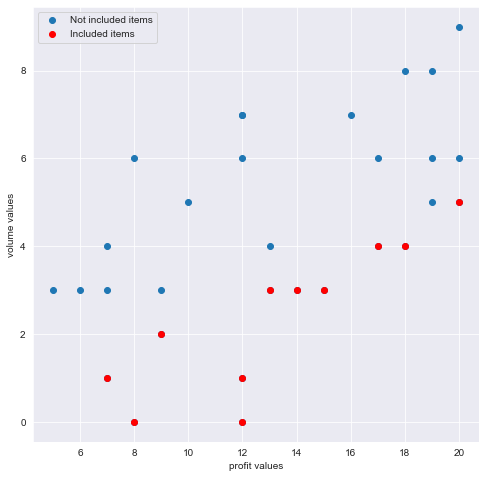

solution: [20, 18, 7, 19, 13, 15, 24, 21, 14, 3, 2]
time to solve the problem = 0.00189 seconds
final profit =  145 
final capacity =  26 / 26 ( 100.0 % )


In [23]:
# Creating a list of zeros of the same length of the number of items, and then it is setting to True the elements that are in the optimal solution.
sol_opt = np.zeros(ic.nItems, bool)
for i in optimal_sol:
    sol_opt[i] = True

profit = int(np.sum(ic.profit_items[sol_opt]))
capacity = int(np.sum(ic.volume_items[sol_opt]))
times.append(end_time)
profits.append(profit)
capacities.append(capacity)

# Plotting the solution of the problem.
plot_solution(np.where(sol_opt > 0), ic.profit_items, ic.volume_items, color="red")
plt.show()

# Printing the solution (index of the items in the knapsack), the total profit and capacity of the solution.
print("solution:", items)
print("time to solve the problem =", end_time, "seconds")
print("final profit = ", profit, "\nfinal capacity = ", capacity, "/", ic.capacity, "(", np.round(capacity / ic.capacity * 100, 2), "% )")

In [25]:
# Compare the algorithms
from tabulate import tabulate

labels = ["Algorithms", "Time (seconds)", "Profits", "Capacities"]
algorithms = ["Greedy approach", "Exhaustive search", "Dynamic algorithm"]

table = zip(algorithms, times, profits, capacities)
print(tabulate(table, headers=labels))

Algorithms           Time (seconds)    Profits    Capacities
-----------------  ----------------  ---------  ------------
Greedy approach             0.00057        138            25
Exhaustive search           4.89768        145            26
Dynamic algorithm           0.00189        145            26
